In [1]:
import torch
import torchvision

In [2]:
print(torch.cuda.is_available())

True


In [3]:
import numpy as np

In [4]:
from torch.autograd import Variable
torch.manual_seed(2017)

In [5]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],[6.182],
                    [7.59],[2.167],[7.042],[10.791],[5.313],[7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],
                      [2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],[1.3]],dtype=np.float32)

In [6]:
import matplotlib.pyplot as plt
#%matplotlib inline

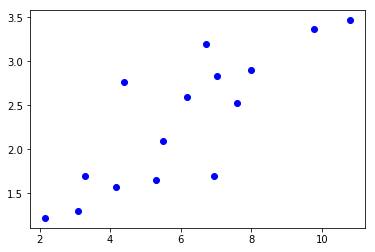

In [7]:
plt.plot(x_train,y_train,'bo')

In [8]:
#转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [9]:
# 定义参数 w和b
w = Variable(torch.randn(1),requires_grad=True)
b = Variable(torch.zeros(1),requires_grad=True)

In [10]:
x_train=Variable(x_train)
y_train=Variable(y_train)

In [11]:
def linear_mode(x):
    return x*w+b

In [12]:
y_ = linear_mode(x_train)

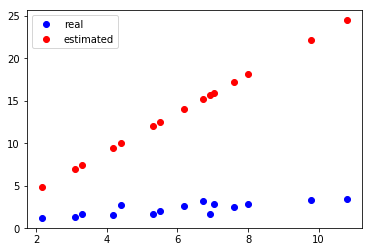

In [13]:
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='real') #'bo' 代表 蓝色圆点
plt.plot(x_train.data.numpy(),y_.data.numpy(),'ro',label='estimated') #'ro' 代表 红色圆点
plt.legend()  #图注

In [14]:
def get_loss(y_, y):
    return torch.mean((y_ - y)**2)
loss = get_loss(y_ , y_train)

In [15]:
print(loss)

tensor(153.3520, grad_fn=<MeanBackward1>)


* 定义好误差函数，接下来我们需要计算w和b的梯度，这时得益于Pytorch的自动求导
* 无需手动去算梯度

In [16]:
loss.backward()

In [17]:
print(w.grad)
print(b.grad)

tensor([161.0043])
tensor([22.8730])


In [19]:
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

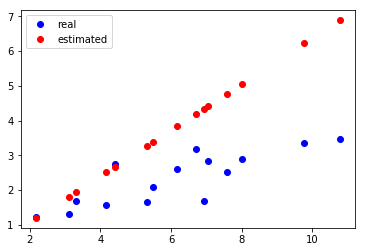

In [20]:
y_ = linear_mode(x_train)
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='real') #'bo' 代表 蓝色圆点
plt.plot(x_train.data.numpy(),y_.data.numpy(),'ro',label='estimated') #'ro' 代表 红色圆点
plt.legend()  #图注

In [26]:
for e in range(10):
    y_=linear_mode(x_train)
    loss=get_loss(y_,y_train)
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    w.data=w.data - 1e-2 * w.grad.data 
    b.data=b.data - 1e-2 * b.grad.data 
    #print('epoch:{},loss:{}'.format(e,loss.data[0]))
    print('epoch:{},loss:{}'.format(e,loss.data))

epoch:0,loss:0.30131959915161133
epoch:1,loss:0.3006228804588318
epoch:2,loss:0.2999469041824341
epoch:3,loss:0.299274742603302
epoch:4,loss:0.2986060082912445
epoch:5,loss:0.2979407012462616
epoch:6,loss:0.29727888107299805
epoch:7,loss:0.2966203987598419
epoch:8,loss:0.2959652841091156
epoch:9,loss:0.29531362652778625


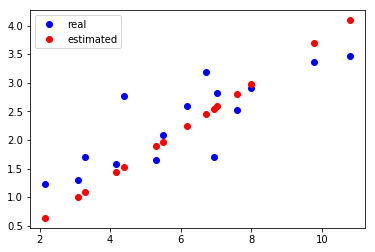

In [27]:
y_ = linear_mode(x_train)
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='real') #'bo' 代表 蓝色圆点
plt.plot(x_train.data.numpy(),y_.data.numpy(),'ro',label='estimated') #'ro' 代表 红色圆点
plt.legend()  #图注